# 💳 Task 2: Credit Risk Prediction

We will predict whether a loan applicant is likely to default using features like education, income, loan amount, and more.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


## 📥 Load Dataset

Please upload the `train.csv` file from the Loan Prediction Dataset.


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


In [4]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 📊 Dataset Overview and Missing Values


In [5]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (614, 13)

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Fill numerical with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill categorical with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop Loan_ID as it's not useful
df.drop('Loan_ID', axis=1, inplace=True)


/tmp/ipython-input-6-2354323590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-6-2354323590.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [7]:
# Label Encoding
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## 📊 Visualize Key Features


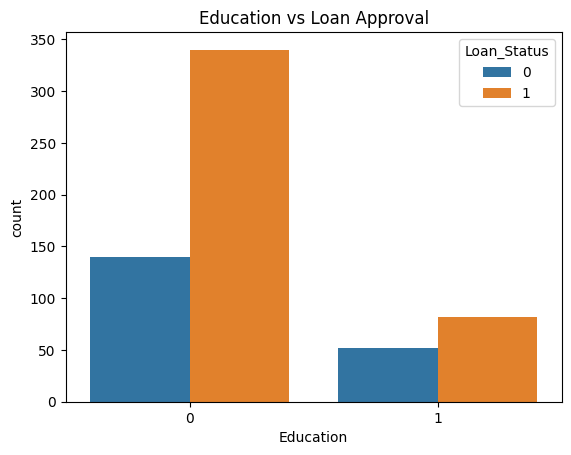

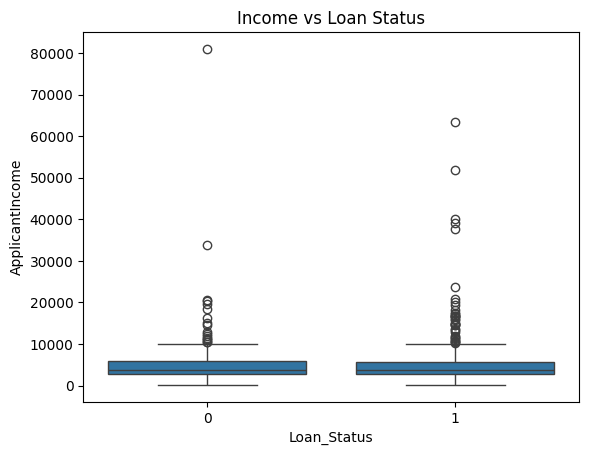

In [8]:
# Education vs Loan Status
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Education vs Loan Approval")
plt.show()

# Income vs Loan Status
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title("Income vs Loan Status")
plt.show()


## 🤖 Train Logistic Regression & Decision Tree


In [9]:
# Features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Confusion Matrix
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 0.7886178861788617
🔹 Decision Tree Accuracy: 0.7154471544715447

Confusion Matrix (Logistic Regression):
 [[18 25]
 [ 1 79]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ✅ Conclusion

- We built models to predict whether a loan applicant will be approved or not.
- Logistic Regression and Decision Tree performed with decent accuracy.
- Education, Income, and Credit History were useful indicators.

This completes **Task 2: Credit Risk Prediction** ✅
